In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import * 
init_printing(fontsize="8pt")

In [2]:
plt.style.use('classic')

In [3]:
## Variables de consumidores
p1, p2, w11, w12, w21, w22 = symbols("p_1 p_2 \omega_{11} \omega_{12} \omega_{21} \omega_{22}", positive = True)
x11, x12, x21, x22, u = symbols("x_{11} x_{12} x_{21} x_{22} u", positive = True)

## Parámetros
alpha, beta = symbols("\\alpha \\beta", positive = True)

## Variables para print más bonito jiji
UMG11, UMG12, UMG21, UMG22 = symbols("UMG_{11} UMG_{12} UMG_{21} UMG_{22}")

In [4]:
### Función de utilidad consumidor 1
def CD1(x, y, params):
    return (x**params[0])*(y**params[1])

### Función de utilidad consumidor 2
def CD2(x, y, params):
    return (x**params[0])*(y**params[1])

# La Caja de Edgeworth

### Descripción de la Economía

- Dotacion total de dos bienes, $\ell = \{1,2\}$

- Dos individuos, $i=\{1,2\}$

- La dotación de cada individuo es

$$ \omega_i = (\omega_{1i}, \omega_{2i}) $$

- La dotación total de cada bien en la economía es

$$ \bar{\omega}_{\ell} = \omega_{\ell 1} + \omega_{\ell 2} $$

- Nos centraremos en asignaciones ($x_{\ell i}$) que no generen desperdicios

$$ x_{\ell 1} + x_{\ell 2} = \bar{\omega}_\ell  $$

- La ***Caja de Edgeworth*** es un rectángulo con longitud $\bar{\omega}_1$ y altura $\bar{\omega}_2$

- Para un nivel de precios $p = (p_1 , p_2) \in \mathbb{R}^2$, el presupuesto del consumidor $i$ es

$$ B_i(p) = \Big\{ x_i \in \mathbb{R}_{+}^{2}: p\cdot x_i \leq p \cdot \omega_i \Big\} $$

- La linea presupuestaria se grafica de tal forma que su pendiente es $-p_1/p_2$

- Asumimos que las $\succsim_i$ son
    - Estrictamente convexas (único máximo)
    - Continuas
    - Fuertemente monótonas
    $$ \text{si } x\geq x', \text{ con } x\neq x', \text{ entonces } x \succ_i x' $$

### Ejercicio

Supongamos:

- Cada individuo tiene preferencias Cobb-Douglas
$$ u_i(x_{1i}, x_{2i}) = x_{1i}^{\alpha} x_{2i}^{\beta} $$
donde $\alpha=\beta=0.5$

- Las dotaciones son
\begin{align*}
    \omega_{1} &= (1,2) \\
    \omega_{2} &= (2,1)
\end{align*}

- Dados los precios $p = (p_1,p_2)$, la riqueza ($W_i$) de los individuos es (normalizando $p_1 = 1$)
\begin{align*}
    W_1 &= 1 + 2p_2 \\
    W_2 &= 2 + p_2
\end{align*}

In [5]:
class Edgeworth:

    ### Inicia el objeto. Entregar funciones de utilidad para cada individuo
    def __init__(self, preferencias_1, preferencias_2, parameters, ps, omegas):
        
        self.preferencias_1 = preferencias_1
        self.preferencias_2 = preferencias_2
        self.params_1 = parameters[0]
        self.params_2 = parameters[1]
        self.p1   = ps[0]   # Es una lista con los precios
        self.p2   = ps[1]
        self.omega_1 = omegas[0] # omegas una lista cuyos elementos son dos listas, cada una con dotaciones
        self.omega_2 = omegas[1]
    
    ### Función inversa del consumidor 1
    def preferencias_1_inv(self, x, u, params): 
        f = self.preferencias_1(x, x21, params)
        inv = solve(f - u, x21)[0]
        return inv

    ### Función inversa del consumidor 2
    def preferencias_2_inv(self, x, u, params): 
        f = self.preferencias_2(x, x22, params)
        inv = solve(f - u, x22)[0]
        return inv

    ### Calcula las demandas
    def demandas(self, p_eval=None):

        ##Dados los supuestos, el óptimo satisface la CPO
        # Calcula utilidades marginales
        umg_11 = diff(self.preferencias_1(x11,x21,self.params_1), x11)
        umg_21 = diff(self.preferencias_1(x11,x21,self.params_1), x21)

        umg_12 = diff(self.preferencias_2(x12,x22,self.params_2), x12) 
        umg_22 = diff(self.preferencias_2(x12,x22,self.params_2), x22)

        if p_eval == None: 

            # Para consumidor 1
            cpo_condicion_1 = umg_11/umg_21 - p1/p2
            restriccionRR_1 = p1*x11 + p2*x21 - self.omega_1[0]*p1 - self.omega_1[1]*p2
            X1_sol = solve([cpo_condicion_1, restriccionRR_1], [x11, x21])

            # Para consumidor 2
            cpo_condicion_2 = umg_12/umg_22 - p1/p2
            restriccionRR_2 = p1*x12 + p2*x22 - self.omega_2[0]*p1 - self.omega_2[1]*p2
            X2_sol = solve([cpo_condicion_2, restriccionRR_2], [x12, x22])

            return X1_sol, X2_sol
        
        else: 

            # Para consumidor 1
            cpo_condicion_1 = umg_11/umg_21 - p_eval[0]/p_eval[1]
            restriccionRR_1 = p_eval[0]*x11 + p_eval[1]*x21 - self.omega_1[0]*p_eval[0] - self.omega_1[1]*p_eval[1]
            X1_sol = solve([cpo_condicion_1, restriccionRR_1], [x11, x21])

            # Para consumidor 2
            cpo_condicion_2 = umg_12/umg_22 - p_eval[0]/p_eval[1]
            restriccionRR_2 = p_eval[0]*x12 + p_eval[1]*x22 - self.omega_2[0]*p_eval[0] - self.omega_2[1]*p_eval[1]
            X2_sol = solve([cpo_condicion_2, restriccionRR_2], [x12, x22])

            return X1_sol, X2_sol
            

    ### Utilidad inicial
    def utilidad_inicial(self):
        ### Calcula utilidad en las dotaciones
        u0_1 = self.preferencias_1(self.omega_1[0], self.omega_1[1],self.params_1)
        u0_2 = self.preferencias_2(self.omega_2[0], self.omega_2[1],self.params_2)
        
        return u0_1, u0_2

    ### Precio de equilibrio para dotaciones
    def p_equilibrio(self):

        dems = self.demandas()
        d1   = dems[0].values()
        d2   = dems[1].values()

        d11, d21 = d1
        d12, d22 = d2

        cond_clareo = d11 + d12 - self.omega_1[0] - self.omega_2[0]
        p_eq = solve(cond_clareo, [p1], dict=True)[0]

        return p_eq

    ### Calcula utilidades marginales
    def umg(self):

        umg_11 = diff(self.preferencias_1(x11,x21,self.params_1), x11)
        umg_21 = diff(self.preferencias_1(x11,x21,self.params_1), x21)

        umg_12 = diff(self.preferencias_2(x12,x22,self.params_2), x12)
        umg_22 = diff(self.preferencias_2(x12,x22,self.params_2), x22)

        return {UMG11: umg_11, UMG12: umg_12, UMG21: umg_21, UMG22: umg_22}
    
    ### Obtiene Función de Curva de Contrato
    def curva_contrato(self):

        umg_11, umg_12, umg_21, umg_22 = self.umg().values()

        # Dotaciones totales de cada bien
        omega_bar_1 = self.omega_1[0] + self.omega_2[0]
        omega_bar_2 = self.omega_1[1] + self.omega_2[1]
        
        # Deja la RMSs en función de solo dos variables
        umg_12 = umg_12.subs([(x12, omega_bar_1 - x11), (x22, omega_bar_2 - x21)])
        umg_22 = umg_22.subs([(x12, omega_bar_1 - x11), (x22, omega_bar_2 - x21)])

        # Iguala las RMSs
        rmss  = umg_11/umg_21 - umg_12/umg_22
        return solve(rmss, x21)[0]

    ### Obtiene funciones de la restricción presupuestaria
    def rest_presupuesto(self):
        rp1 = (self.p1*self.omega_1[0] + self.p2*self.omega_1[1])/self.p2 - x11*self.p1/self.p2
        rp2 = (self.p1*self.omega_2[0] + self.p2*self.omega_2[1])/self.p2 - x12*self.p1/self.p2

        return {x21: rp1, x22: rp2}

    ### Obtiene funciones de oferta como vectores
    def OC(self):
        
        of_11 = np.array([])
        of_21 = np.array([])

        of_12 = np.array([])
        of_22 = np.array([])
        
        # Mueve solamente p1, de manera que cambia el precio relativo
        p = np.linspace(1e-4, 10, 100)

        for _p1 in p:
            ofs = self.demandas([_p1, self.p2])

            o11, o21 = ofs[0].values()
            o12, o22 = ofs[1].values()

            of_11 = np.append(of_11, o11)
            of_21 = np.append(of_21, o21)
            of_12 = np.append(of_12, o12)
            of_22 = np.append(of_22, o22)
        
        return of_11, of_21, of_12, of_22

    ### Obtiene gráfica de caja de Edgeworth
    def caja_edgeworth(self):

        omega_bar_1 = self.omega_1[0] + self.omega_2[0]
        omega_bar_2 = self.omega_1[1] + self.omega_2[1]

        u0_1, u0_2 = self.utilidad_inicial()

        ### Curva de indiferencia en nivel dotación
        x_eje = np.linspace(1e-4, omega_bar_1, 60) # Eje X

        preferencias_1_inv_vector = np.vectorize(self.preferencias_1_inv, excluded=["params"])
        preferencias_2_inv_vector = np.vectorize(self.preferencias_2_inv, excluded=["params"])
        
        ind_1 = preferencias_1_inv_vector(x = x_eje, u = u0_1, params = self.params_1)
        ind_2 = preferencias_2_inv_vector(x = x_eje, u = u0_2, params = self.params_2)  

        ### Curva de contrato
        curva_contrato_vector = [self.curva_contrato().subs(x11, j) for j in x_eje]

        ### Restricción presupuestaria
        f1, f2 = self.rest_presupuesto().values() # En realidad solo necesitamos una, ya que son análogas
        rest_presupuesto_vector = [f1.subs(x11, j) for j in [0, omega_bar_1]]

        ### Ofertas
        of_11, of_21, of_12, of_22,  = self.OC()

        ### Gráficas
        ############

        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx().twiny()

        # Arregla eje X
        ax1.set_xlim(0, omega_bar_1)
        ax2.set_xlim(omega_bar_1, 0)

        # Arregla eje Y
        ax1.set_ylim(0, omega_bar_2)
        ax2.set_ylim(omega_bar_2, 0)

        ## Grafica Curva indiferencia
        ax1.plot(x_eje, ind_1, 'g-', label="CI. Ind. 1")
        ax2.plot(x_eje, ind_2, 'b-', label="CI. Ind. 2")

        ### Grafica Ofertas
        ax1.plot(of_11, of_21, color = "g", linestyle="--",label="Of. Ind. 1")
        ax2.plot(of_12, of_22, color = "b", linestyle="--",label="Of. Ind. 2")

        ## Grafica Curva de Contrato
        ax1.plot(x_eje, curva_contrato_vector, color = "black", label="Curva Contrato")

        ## Grafica restricción presupuestaria
        ax1.plot([0, omega_bar_1], rest_presupuesto_vector, color = "purple", linestyle="-.", label="RP")

        ## Grafica Dotaciones iniciales
        ax1.scatter(self.omega_1[0], self.omega_1[1], s=35, marker= "o", color = "g", label="Dotación ind. 1")
        ax2.scatter(self.omega_2[0], self.omega_2[1], s=35, marker= "o", color = "b", label="Dotación ind. 2")

        ax1.set_xlabel('Bien 1, Cons.1', color="g")
        ax1.set_ylabel('Bien 2, Cons.1', color='g')
        
        ax2.set_xlabel('Bien 1, Cons.2', color='b')
        ax2.set_ylabel('Bien 2, Cons.2', color='b')

        fig.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2,
            borderaxespad=0, frameon=True)
        plt.show()

In [6]:
# Datos del enunciado
parametros = [[0.5, 0.5], [0.5, 0.5]]
dotaciones = [[1,2],[2,1]]
p = [p1, p2]
Edg = Edgeworth(CD1, CD2, parametros, p, dotaciones)

- La utilidad que tienen los individuos (individuo 1, individuo 2) consumiendo sus dotaciones es

In [7]:
Edg.utilidad_inicial()

- Las utilidades marginales son

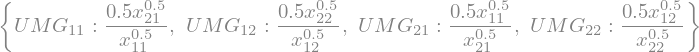

In [8]:
Edg.umg()

- La restricción presupuestaria es

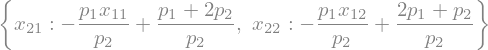

In [9]:
Edg.rest_presupuesto()

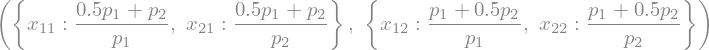

In [10]:
Edg.demandas() # Se puede evaluar en en un punto de precios demandas([p1,p2])

- La curva de contrato para estas funciones de utilidad y dotaciones es ($x_{21} = \; ...$)

In [11]:
Edg.curva_contrato()

- El nivel de precios relativo que permite obtener un óptimo de pareto para estas dotaciones iniciales es

In [12]:
Edg.p_equilibrio()

- Los precios son iguales, entonces para $p_1 = 1$, debe ser que $p_2 = 1$.

- El gráfico de la Caja de Edgeworth para estos precios nos da

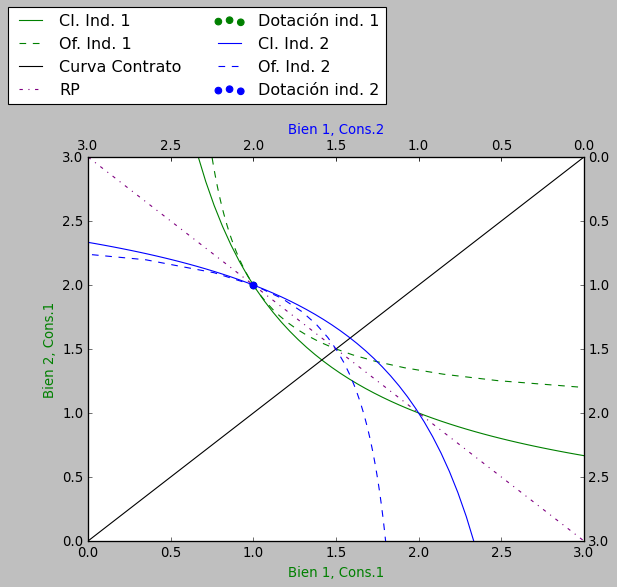

In [13]:
p = [1, 1] # [p1, p2]
Edg = Edgeworth(CD1, CD2, parametros, p, dotaciones)
Edg.caja_edgeworth()